In [1]:
%matplotlib inline

In [79]:
#using xarray for data read
import xarray as xa
import numpy as np

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean


***If you are on a mac and use conda-forge and homebrew, cartopy will not work if you have gdal/geos installed via homebrew*** Oct 5 2017

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

In [4]:
#greater bering region
extent = [-180, -135, 45, 75]


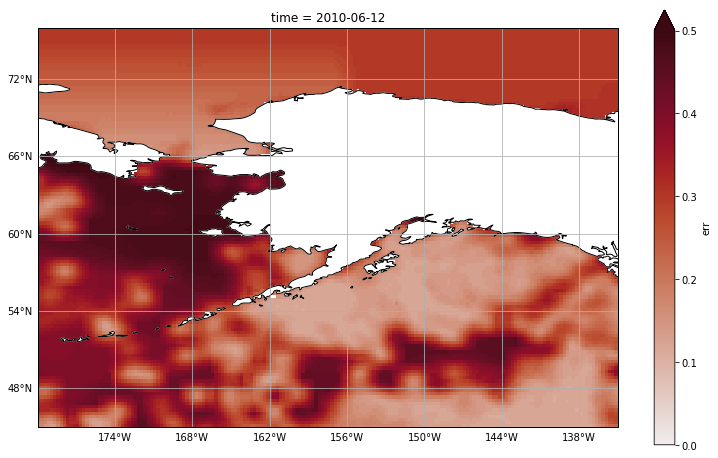

In [63]:
#avhrr only data is whats available at esrl
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.err.2010.v2.nc'

cmap = cmocean.cm.amp
with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    (xadf['err'].sel(time='2010-06-12')).isel(lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',
                                                                             robust=True,ax=ax,vmin=0,vmax=0.5,
                                                                             transform=ccrs.PlateCarree(),
                                                                             cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)

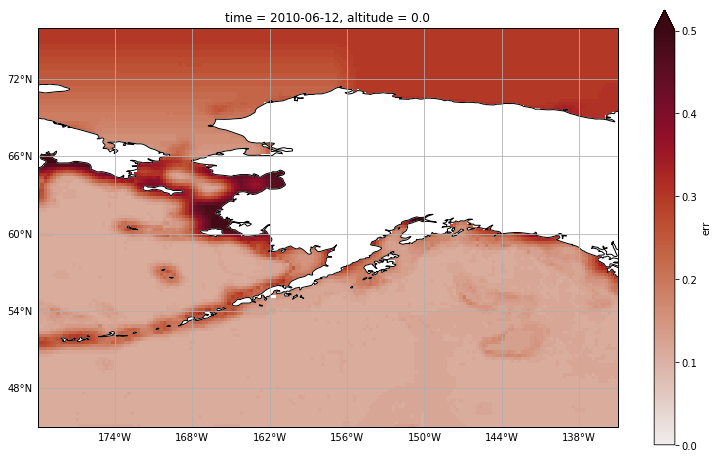

In [66]:
#avhrr+amsr data is available for 2002-2011 from ncei
erddap_path="http://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst2AmsrAgg"

cmap = cmocean.cm.amp
with xa.open_dataset(erddap_path) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    (xadf['err'].sel(time='2010-06-12')).isel(latitude=slice(-180,-45),longitude=slice(-750,-500)).plot(x='longitude', y='latitude',
                                                                             robust=True,ax=ax,vmin=0,vmax=0.5,
                                                                             transform=ccrs.PlateCarree(),
                                                                             cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)

## Compare timeseries of two SST retrieval algorithms at M2 (56.869N 164.05W)

In [59]:
erdf = xa.open_dataset(erddap_path) 
sst_amsrpavhrr = erdf['sst'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(56.63,57),longitude=slice(195.8,196))

In [60]:
threddspath_sst='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2010.v2.nc'
thdf = xa.open_dataset(threddspath_sst)
sst_avhrr = thdf['sst'].sel(time=slice('2010-06-01','2010-09-20'),
                            lat=slice(56.63,57),lon=slice(195.8,196))

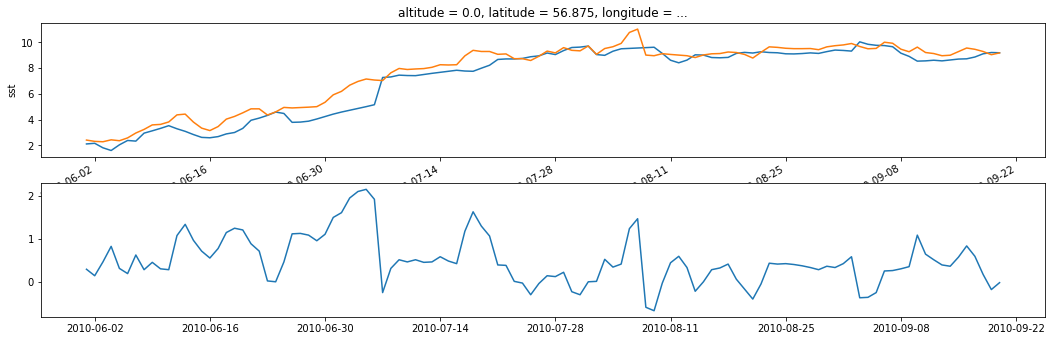

In [61]:
plt.figure(1, figsize=(18, 6), facecolor='w', edgecolor='w')
plt.subplot(2,1,1)

sst_avhrr.plot() #blue
sst_amsrpavhrr.plot() #orange

plt.subplot(2,1,2)
plt.plot(sst_amsrpavhrr.time,sst_amsrpavhrr.data[:,0,0,0]-sst_avhrr.data[:,0,0])

## Compare timeseries of two SST retrieval algorithms at M8 (62.19N 174.689W)

In [70]:
sst_amsrpavhrr = erdf['sst'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62,62.2),longitude=slice(185.5,185.7))

In [72]:
sst_avhrr = thdf['sst'].sel(time=slice('2010-06-01','2010-09-20'),
                            lat=slice(62,62.2),lon=slice(185.5,185.7))

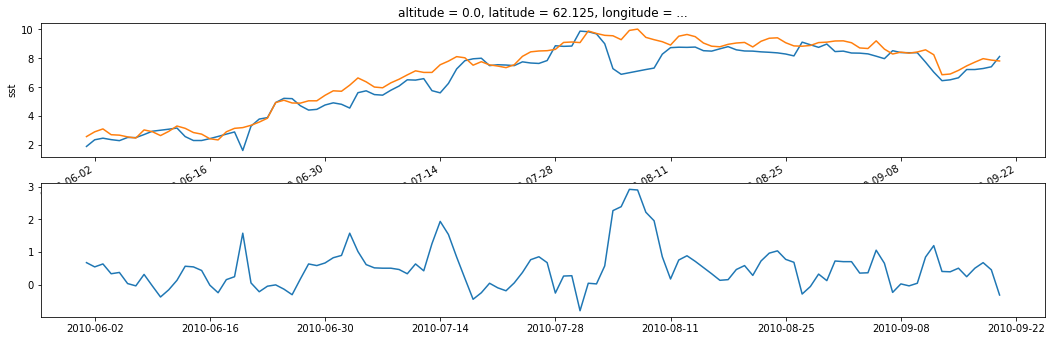

In [73]:
plt.figure(1, figsize=(18, 6), facecolor='w', edgecolor='w')
plt.subplot(2,1,1)

sst_avhrr.plot() #blue
sst_amsrpavhrr.plot() #orange

plt.subplot(2,1,2)
plt.plot(sst_amsrpavhrr.time,sst_amsrpavhrr.data[:,0,0,0]-sst_avhrr.data[:,0,0])

In [85]:
print sst_amsrpavhrr.mean()
print sst_avhrr.mean()
print (sst_amsrpavhrr.data[:,0,0,0]-sst_avhrr.data[:,0,0]).mean()

<xarray.DataArray 'sst' ()>
array(7.002678394317627)
<xarray.DataArray 'sst' ()>
array(6.486964168293135)
0.515714238797
